In [1]:
#LendingClubCaseStudy

In [2]:
#import libraries

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings(action="ignore")
df = pd.read_csv(r"loan.csv")

In [5]:
df.shape

(39717, 111)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
pd.options.display.min_rows = 115

In [9]:
df.shape

(39717, 111)

In [10]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
df.emp_title.isna().sum()

2459

In [12]:
#Remove columns with oly NULL values ------ 54 columns removed

In [13]:

df = df.loc[:, df.isnull().sum() != 39717]

In [14]:
count = (df.isnull().sum() == 39717).sum()
print(count)

0


In [15]:
df.shape

(39717, 57)

In [16]:
(df.isnull().sum() == 39717).sum()

0

In [17]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [18]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [19]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
(df.isnull().sum() > 0).sum()

14

In [21]:
df.columns[(df.isnull().sum() > 0)].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [22]:
# replace Null with "Not Available" for all the values in emp_title column

In [23]:
df['emp_title'].fillna("Not Available", inplace=True)

In [24]:
df.columns[(df.isnull().sum() > 0)].tolist()

['emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [25]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [26]:
# replace Null with "Not Available" for all the values in emp_length column

In [27]:
df['emp_length'].fillna("Not Available", inplace=True)

In [28]:
df.columns[(df.isnull().sum() > 0)].tolist()

['desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [29]:
# replace Null with "Not Available" for all the values in desc column

In [30]:
df['desc'].fillna("Not Available", inplace=True)

In [31]:
df_loan = df[df['loan_status'].str.lower() != "current"]

In [32]:
df_loan.shape

(38577, 57)

In [33]:
df_loan.columns[(df_loan.isnull().sum() > 0)].tolist()

['title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [34]:
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                              0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [35]:
df.shape

(39717, 57)

In [36]:
## Remove columns that have no relevant data

In [37]:
not_req_col = []
for i in df_loan.columns:
    # Check if unique value count is 1
    if df_loan[i].nunique() == 1:
        not_req_col.append(i)
print(not_req_col)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [38]:
## Removing columns that have only one value here as part of previous step

In [39]:
df_loan.drop(not_req_col, axis = 1, inplace = True)

In [40]:
df_loan.shape

(38577, 46)

In [41]:
df_loan[df_loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [42]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [43]:
##Removed single record for revol_util whose value was null

In [44]:
df_loan = df_loan[df_loan['id'] != 352047]

In [45]:
df_loan.shape

(38576, 46)

In [46]:
df_loan.annual_inc.dtype

dtype('float64')

In [47]:
##Remove column mths_since_last_record

In [48]:
df_loan = df_loan.drop('mths_since_last_record', axis=1)

In [49]:
##Remove column next_pymnt_d

In [50]:
df_loan = df_loan.drop('next_pymnt_d', axis=1)

In [51]:
##Remove column title

In [52]:
df_loan = df_loan.drop('title', axis=1)

In [53]:
##Remove column mths_since_last_delinq

In [54]:
df_loan = df_loan.drop('mths_since_last_delinq', axis=1)

In [55]:
df_loan.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
url                          0
desc                         0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  49
total_acc                    0
total_pymnt                  0
total_py

In [56]:
df_loan.revol_util.isna()

0        False
1        False
2        False
3        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
         ...  
39687    False
39688    False
39689    False
39690    False
39691    False
39692    False
39693    False
39694    False
39695    False
39696    False
39697    False
39698    False
39699    False
39700    False
39701    False
39702    False
39703    False
39704    False
39705    False
39706    False
39707    False
39708    False
39709    False
39710    False
39711    False
39712    False
39713    False
39714    False
39715    False
39716    False
Name: revol_util, Length: 38576, dtype: bool

In [57]:
### For column revol_util, conider ony not null values
### For column last_pymnt_d, conider ony not null values
### For column last_credit_pull_d, conider ony not null values
### For column pub_rec_bankruptcies, conider ony not null values

In [58]:
df_loan = df_loan[df_loan.revol_util.notna()]

In [59]:
df_loan = df_loan[df_loan.last_pymnt_d.notna()]

In [60]:
df_loan = df_loan[df_loan.last_credit_pull_d.notna()]

In [61]:
df_loan = df_loan[df_loan.pub_rec_bankruptcies.notna()]

In [62]:
###drop url column as the data in url is not helpful in creating derived column

In [63]:
df_loan = df_loan.drop('url', axis=1)

In [64]:
df_loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

In [65]:
df_loan.shape

(37762, 41)

In [66]:
### Remove % from int_rate,revol_util

In [67]:
df_loan.int_rate = df_loan.int_rate.str.replace('%','').astype(float)
df_loan.revol_util = df_loan.revol_util.str.replace('%','').astype(float)

In [68]:
df_loan.shape

(37762, 41)

In [69]:
df_loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       'Not Available'], dtype=object)

In [70]:
####impute the emp_lenth columns

In [71]:

emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10}


df_loan['emp_length'] = df_loan['emp_length'].replace(emp_length_mapping)

In [72]:
df_loan.emp_length.isna().sum()

0

In [73]:
df_loan.issue_d.dtype

dtype('O')

In [157]:
df_loan['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [158]:
# Replace '36 months' and '60 months' with 36 and 60 respectively
df_loan['term'] = df_loan['term'].str.replace(' months', '').astype(int)

In [74]:
#Converting issue_d to datetime format for driving columns

df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y')

df_loan['issue_year'] = df_loan['issue_d'].dt.year
df_loan['issue_month'] = df_loan['issue_d'].dt.month

In [75]:
# Convert 'earliest_cr_line' to datetime format
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'], format='%b-%y')

df_loan['earliest_cr_year'] = df_loan['earliest_cr_line'].dt.year
df_loan['earliest_cr_month'] = df_loan['earliest_cr_line'].dt.month

In [76]:
# Convert 'last_pymnt_d' to datetime format
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'], format='%b-%y')

df_loan['last_pymnt_year'] = df_loan['last_pymnt_d'].dt.year
df_loan['last_pymnt_month'] = df_loan['last_pymnt_d'].dt.month

In [77]:
# Convert 'last_credit_pull_d' to datetime format
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'], format='%b-%y')

df_loan['last_credit_pull_year'] = df_loan['last_credit_pull_d'].dt.year
df_loan['last_credit_pull_month'] = df_loan['last_credit_pull_d'].dt.month

In [78]:
#### Round off float type columns to 2 decimal places
df['total_pymnt'] = df['total_pymnt'].round(2)
df['total_pymnt_inv'] = df['total_pymnt_inv'].round(2)
df['total_rec_prncp'] = df['total_rec_prncp'].round(2)
df['total_rec_int'] = df['total_rec_int'].round(2)
df['last_pymnt_amnt'] = df['last_pymnt_amnt'].round(2)

In [79]:
#Mark loan_status as category column

In [80]:
df_loan['loan_status'] = df_loan['loan_status'].astype('category')

In [81]:
df_loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                      category
desc                               object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetim

In [82]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_year,earliest_cr_month,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,2016-05-01,0.0,2011,12,1985,1,2015,1,2016,5
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,2013-09-01,0.0,2011,12,1999,4,2013,4,2013,9
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2016-05-01,0.0,2011,12,2001,11,2014,6,2016,5
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2016-04-01,0.0,2011,12,1996,2,2015,1,2016,4
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,2016-01-01,0.0,2011,12,2004,11,2015,1,2016,1


print(df_loan.head().T)

In [83]:
###Understanding data distribution

<Axes: >

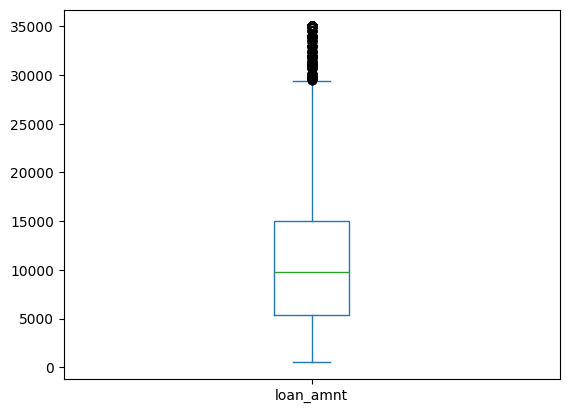

In [84]:
df_loan.loan_amnt.plot.box()

In [128]:
charged_off_loans = df_loan[df_loan['loan_status'] == 'Charged Off']
default_trend = charged_off_loans.groupby('issue_year').size()



In [131]:
default_trend

issue_year
2007       2
2008     169
2009     579
2010    1460
2011    3215
dtype: int64

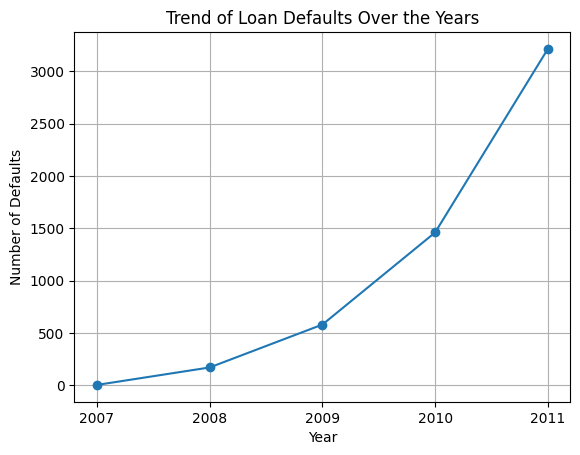

In [173]:
default_trend.plot(kind='line', marker='o')
plt.title('Trend of Loan Defaults Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Defaults')
plt.xticks(ticks=default_trend.index, labels=default_trend.index.astype(int))
plt.grid(True)

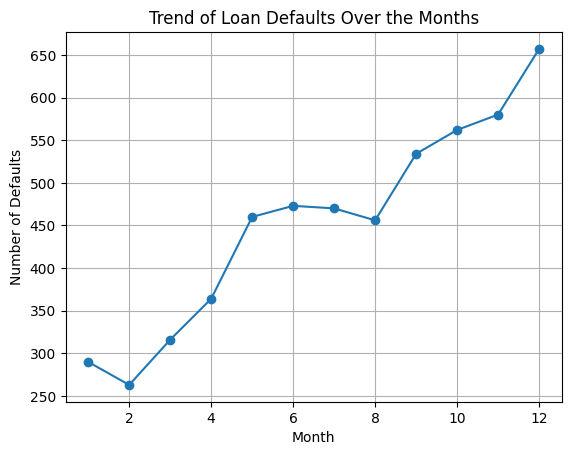

In [177]:
default_trend_month = charged_off_loans.groupby('issue_month').size()

default_trend_month.plot(kind='line', marker='o')
plt.title('Trend of Loan Defaults Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Defaults')
plt.grid(True)

In [176]:
default_trend_month

issue_month
1     290
2     263
3     316
4     364
5     460
6     473
7     470
8     456
9     534
10    562
11    580
12    657
dtype: int64

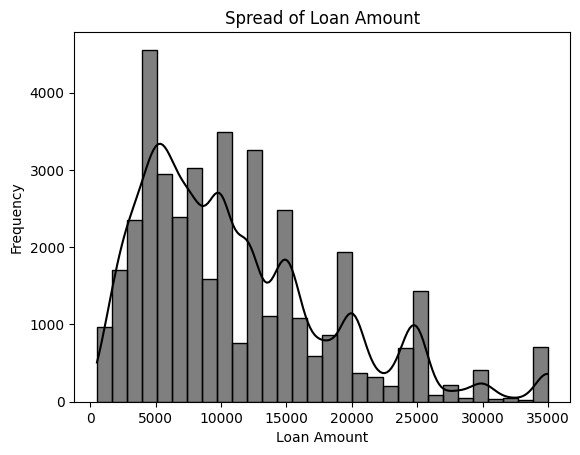

In [137]:
###Loan amount spread
sns.histplot(df['loan_amnt'], kde=True, bins=30, color='black')
plt.title('Spread of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [86]:
df_loan.loan_status.unique()

['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']

In [87]:
##borrowers with lower grades (closer to G) are more likely to default on their loans.

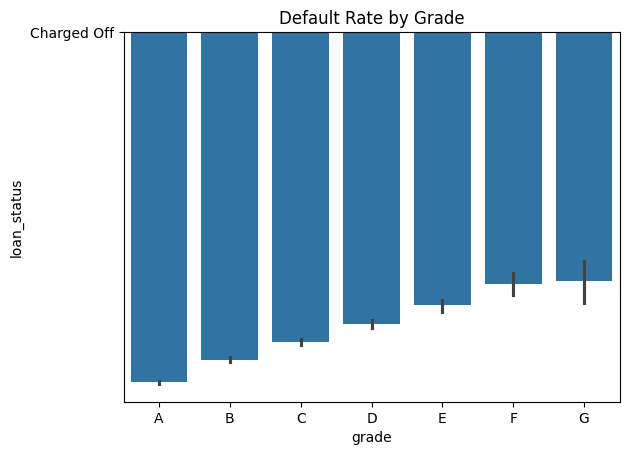

In [88]:
grades_ordered = sorted(df_loan['grade'].unique())
sns.barplot(x='grade', y='loan_status', data=df_loan, order=grades_ordered)
plt.title('Default Rate by Grade')
plt.show()

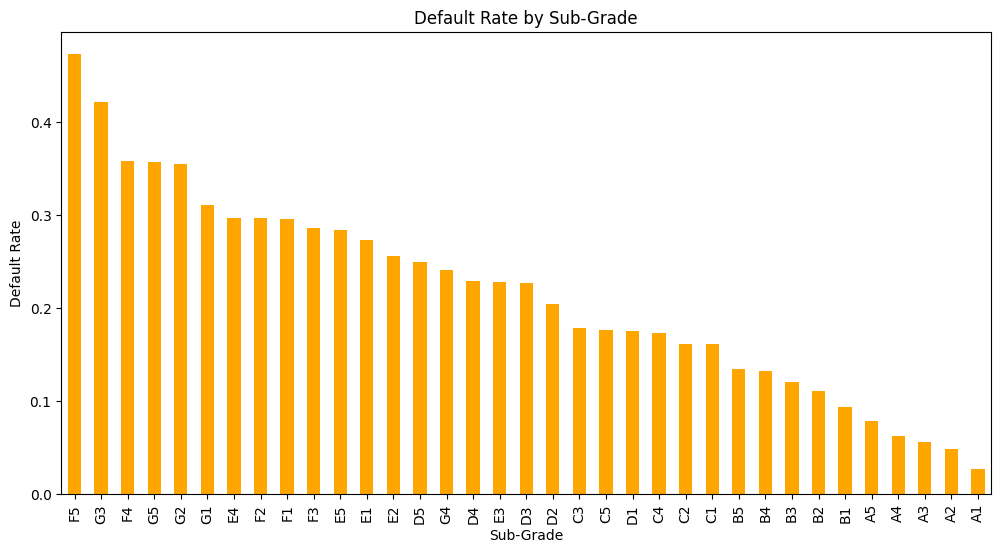

In [169]:
default_rates = df_loan[df_loan['loan_status'] == 'Charged Off'].groupby('sub_grade').size() / df_loan.groupby('sub_grade').size()

plt.figure(figsize=(12, 6))
default_rates.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Default Rate by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Default Rate')
plt.show()

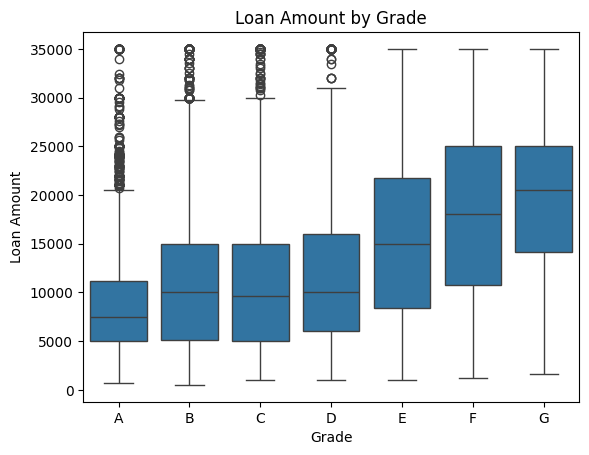

In [142]:
grades_ordered = sorted(df_loan['grade'].unique())


sns.boxplot(x='grade', y='loan_amnt', data=df_loan,order=grades_ordered)
plt.title('Loan Amount by Grade')
plt.ylabel('Loan Amount')
plt.xlabel('Grade')
plt.show()

In [91]:
df_loan.loan_status.dtype

CategoricalDtype(categories=['Charged Off', 'Fully Paid'], ordered=False, categories_dtype=object)

In [92]:
## It seems that loans with higher interest rates are likely to charged off

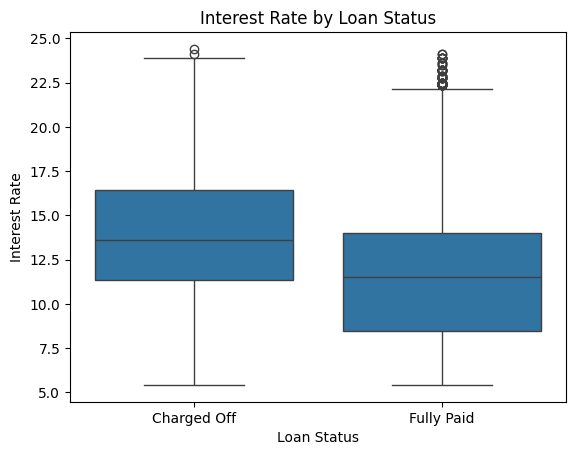

In [144]:
sns.boxplot(x='loan_status', y='int_rate', data=df_loan)
plt.title('Interest Rate by Loan Status')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.show()

In [94]:
##Borrowers with high credit utilization rate are likely to default

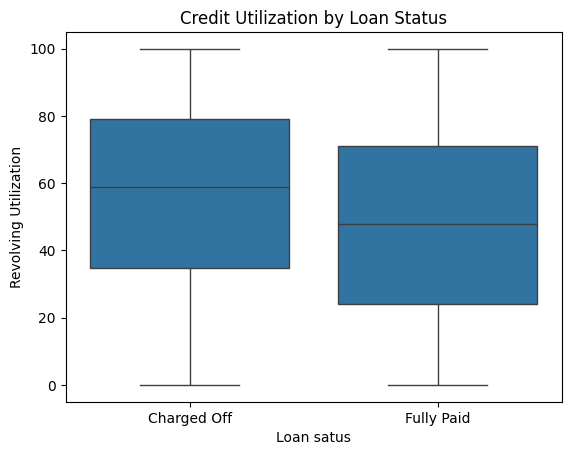

In [147]:
sns.boxplot(x='loan_status', y='revol_util', data=df_loan)
plt.title('Credit Utilization by Loan Status')
plt.ylabel('Revolving Utilization')
plt.xlabel('Loan satus')
plt.show()

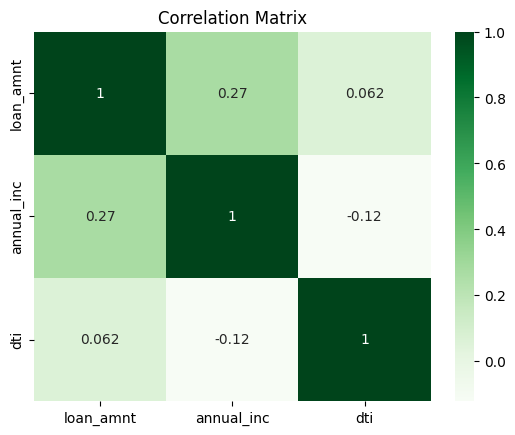

In [96]:
numerical_cols = ['loan_amnt', 'annual_inc', 'dti']
correlation_matrix = df_loan[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

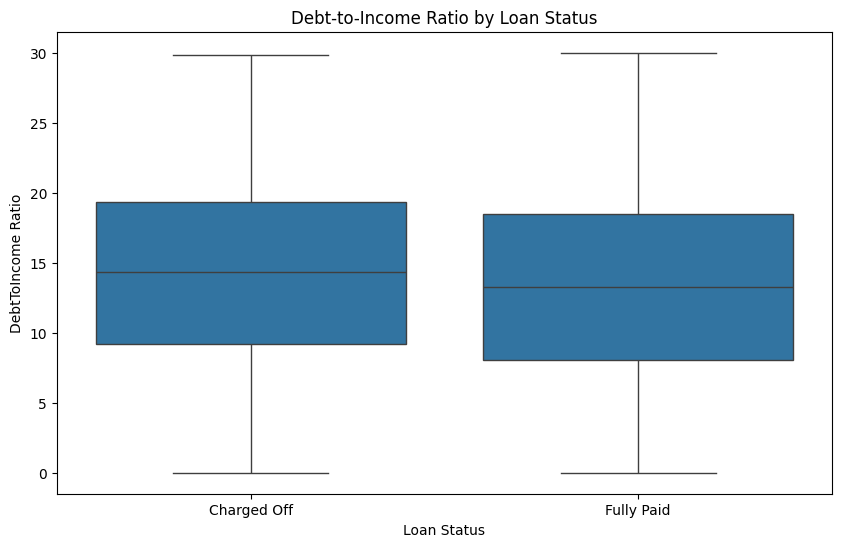

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df_loan)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DebtToIncome Ratio')
plt.show()

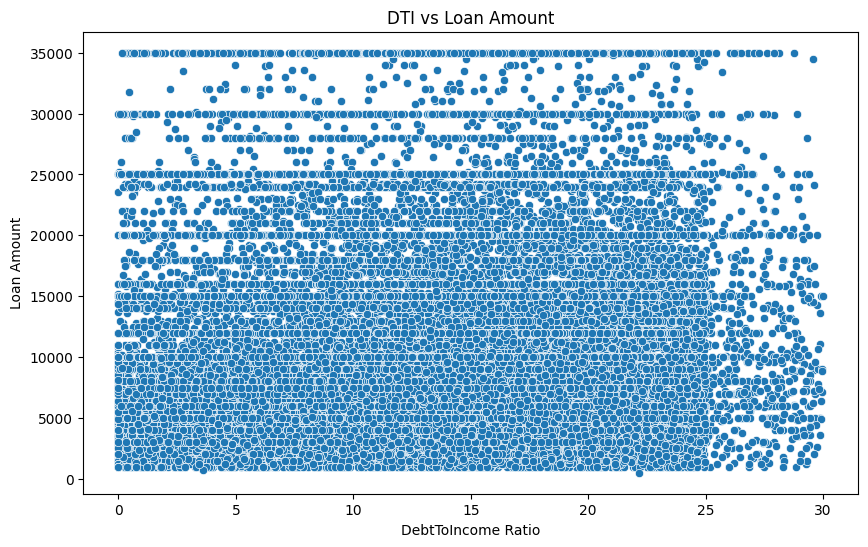

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='loan_amnt', data=df_loan)
plt.title('DTI vs Loan Amount')
plt.xlabel('DebtToIncome Ratio')
plt.ylabel('Loan Amount')
plt.show()

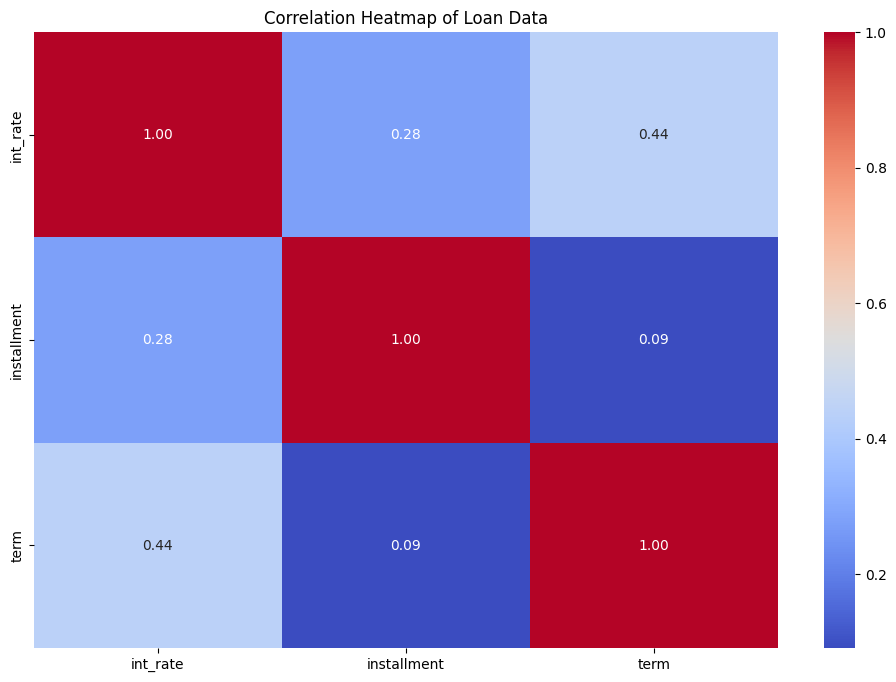

In [164]:
columns = [
    'int_rate', 'installment',
    'term'
]

# Create a correlation matrix
corr_matrix = df_loan[columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Loan Data')
plt.show()

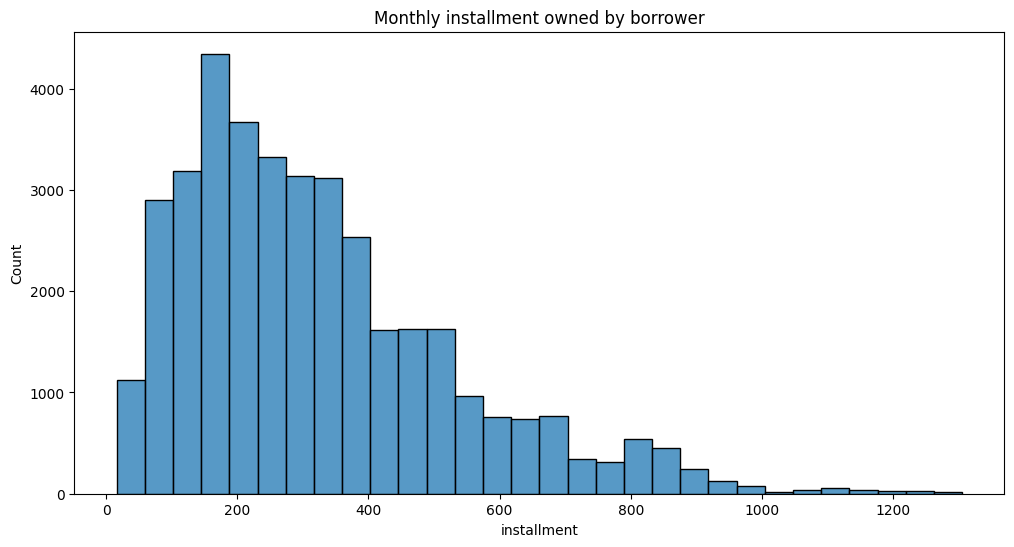

In [114]:
plt.figure(figsize=(12, 6))
sns.histplot(df_loan['installment'], bins=30)
plt.title('Monthly installment owned by borrower')
plt.show()

In [116]:
df_loan.emp_length.value_counts()

emp_length
10               8359
0                4322
2                4196
3                3940
4                3283
5                3147
1                3062
6                2132
7                1685
8                1405
9                1206
Not Available    1025
Name: count, dtype: int64

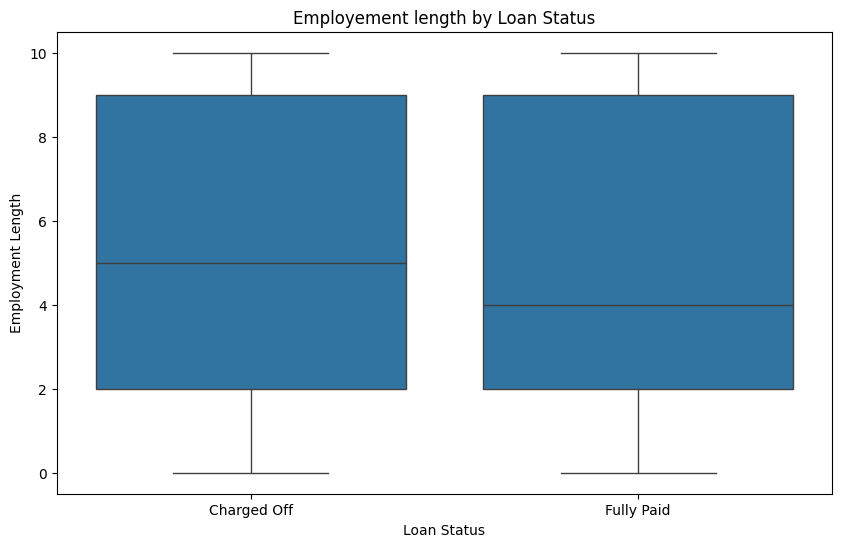

In [122]:
###Employement length is not showing any relation with loan default
df_emplen_filtered = df_loan[df_loan['emp_length'] != 'Not Available']
df_emplen_filtered['emp_length'] = pd.to_numeric(df_emplen_filtered['emp_length'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='emp_length', data=df_emplen_filtered)
plt.title('Employement length by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length')
plt.show()

In [121]:
df_emplen_filtered.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_year,earliest_cr_month,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,2016-05-01,0.0,2011,12,1985,1,2015,1,2016,5
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,2013-09-01,0.0,2011,12,1999,4,2013,4,2013,9
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2016-05-01,0.0,2011,12,2001,11,2014,6,2016,5
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2016-04-01,0.0,2011,12,1996,2,2015,1,2016,4
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,2016-01-01,0.0,2011,12,2004,11,2015,1,2016,1


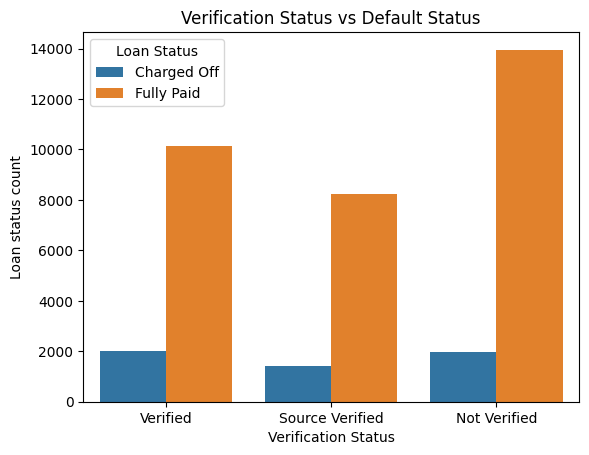

In [126]:
sns.countplot(x='verification_status', hue='loan_status', data=df_loan)
plt.title('Verification Status vs Default Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan status count')
plt.legend(title='Loan Status')
plt.show()

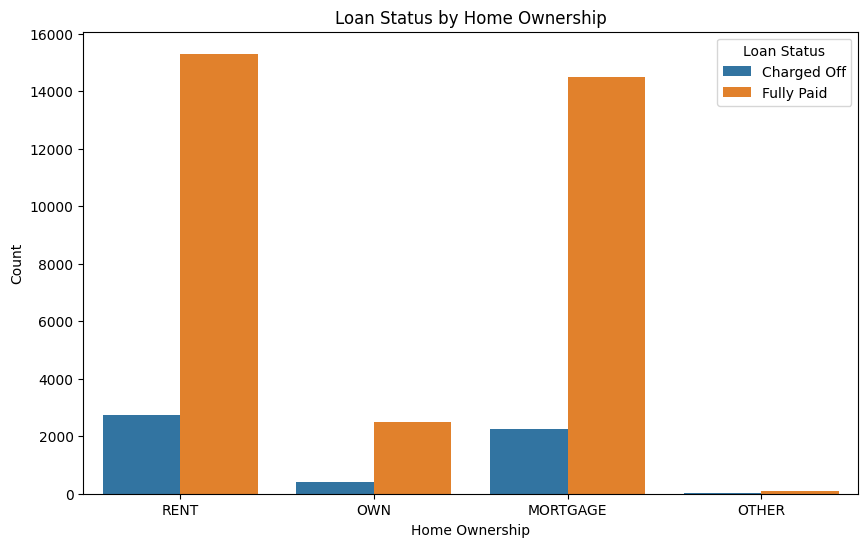

In [166]:
##Loan Status by Home Ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_loan)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()